<a href="https://colab.research.google.com/github/ahmadfahriramadhani/Pengolahan-Citra-Digital-F-/blob/main/UTS_PCD(AhmadFahriR.).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.Lakukan pengolahan citra digital menggunakan Google Colab.

Berikut adalah langkah-langkah yang harus dilakukan:

**a. Memuat Gambar Grayscale dari Link:**
- Muatlah gambar dari sebuah link

**b. Histogram Equalization:**
- Lakukan **Histogram Equalization** pada gambar grayscale yang sudah dihasilkan.
- Plot histogram gambar **sebelum** dan **sesudah** dilakukan histogram equalization,
- Plot gambar **sebelum** dan **sesudah** dilakukan manipulasi histogram.

**c. Filtering di Domain Frekuensi menggunakan Gaussian Filtering:**
- Lakukan **Gaussian Filtering** pada gambar dengan menggunakan filtering di domain frekuensi.
- Tampilkan hasil gambar setelah Gaussian filtering.

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import urllib.request

Resolusi gambar 1: 220x330 piksel


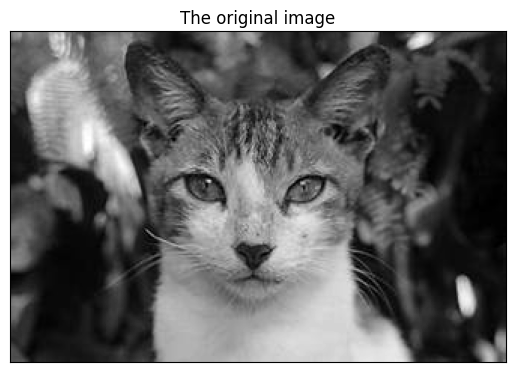

In [12]:
urllib.request.urlretrieve(
'https://tse1.mm.bing.net/th?id=OIP.4yi981EKJG3btDu8v6v46QHaE8&pid=Api&P=0&h=220', # link from google image
"gambar_1.png")

# load image
image_1 = cv2.imread('gambar_1.png',cv2.IMREAD_GRAYSCALE) #  cv2.IMREAD_COLOR

# Dapatkan resolusi gambar dalam piksel
width, height = image_1.shape
print(f"Resolusi gambar 1: {width}x{height} piksel")

#tampilkan gambar
plt.title('The original image')
plt.imshow(image_1, cmap = 'gray')
plt.xticks([])
plt.yticks([])
plt.show()

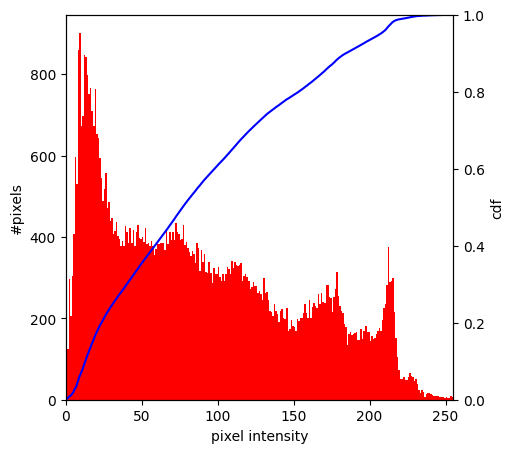

In [13]:
# Membuat plot histogram dan CDF
hist, bins = np.histogram(image_1.flatten(),
                          bins=256,
                          range=[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf / cdf.max()

fig, ax = plt.subplots(figsize=(5,5))

ax.hist(image_1.flatten(),
        bins=256,
        range=[0,256],
        color='r')
ax.set_xlabel('pixel intensity')
ax.set_ylabel('#pixels')
ax.set_xlim(0,255)

ax2 = ax.twinx()
ax2.plot(cdf_normalized, color='b')
ax2.set_ylabel('cdf')
ax2.set_ylim(0,1)

plt.show()


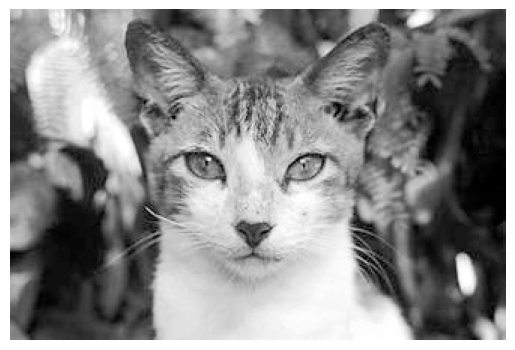

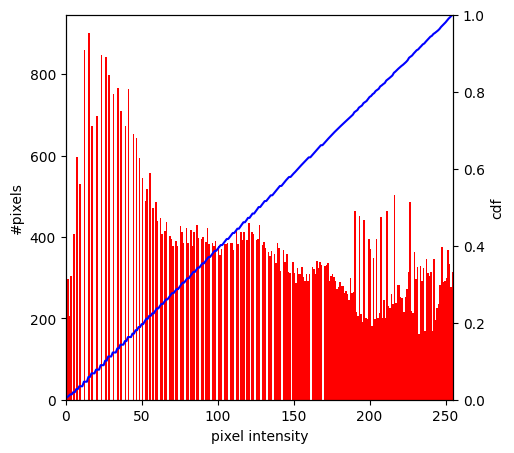

In [14]:
# histogram equalization (global)
equ = cv2.equalizeHist(image_1)

plt.imshow(equ, cmap='gray')
plt.axis('off')
plt.show()

hist, bins = np.histogram(equ.flatten(),
                          bins=256,
                          range=[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf / cdf.max()

fig, ax = plt.subplots(figsize=(5,5))

ax.hist(equ.flatten(),
        bins=256,
        range=[0,256],
        color='r')
ax.set_xlabel('pixel intensity')
ax.set_ylabel('#pixels')
ax.set_xlim(0,255)

ax2 = ax.twinx()
ax2.plot(cdf_normalized, color='b')
ax2.set_ylabel('cdf')
ax2.set_ylim(0,1)

plt.show()

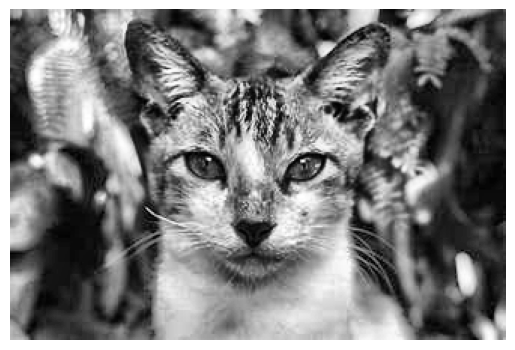

In [15]:
# CLAHE (local)
clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
clahef = clahe.apply(image_1)

plt.imshow(clahef, cmap='gray')
plt.axis('off')
plt.show()



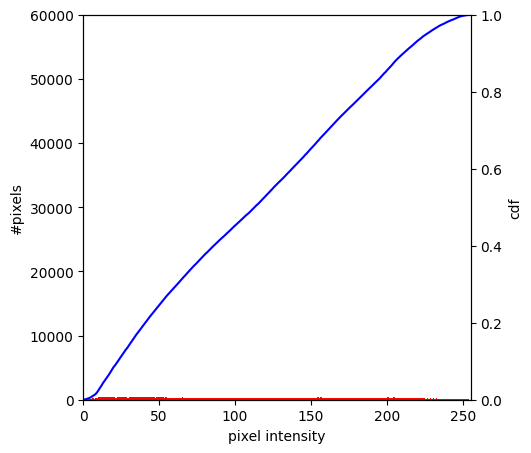

In [16]:
hist, bins = np.histogram(clahef.flatten(),
                          bins=256,
                          range=[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf / cdf.max()

fig, ax = plt.subplots(figsize=(5,5))

ax.hist(clahef.flatten(),
        bins=256,
        range=[0,256],
        color='r')
ax.set_xlabel('pixel intensity')
ax.set_ylabel('#pixels')
ax.set_xlim(0,255)
ax.set_ylim(0,60000)

ax2 = ax.twinx()
ax2.plot(cdf_normalized, color='b')
ax2.set_ylabel('cdf')
ax2.set_ylim(0,1)

plt.show()

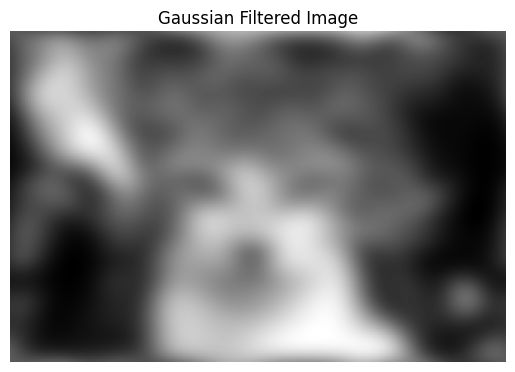

In [18]:
# Fungsi untuk membuat filter Gaussian
def create_gaussian_filter(shape, sigma):
    rows, cols = shape
    center_row, center_col = rows // 2, cols // 2
    def gaussian_function(x, y):
        return np.exp(-((x - center_row)**2 + (y - center_col)**2) / (2 * sigma**2))
    filter = np.fromfunction(gaussian_function, shape)
    filter = filter / np.sum(filter)  # Normalisasi filter
    return filter

# Buat filter Gaussian
gaussian_filter = create_gaussian_filter(image_1.shape, sigma=5)

# Terapkan filter pada domain frekuensi
F = np.fft.fft2(image_1)
Fshift = np.fft.fftshift(F)
filtered_Fshift = Fshift * gaussian_filter
filtered_F = np.fft.ifftshift(filtered_Fshift)
filtered_image = np.fft.ifft2(filtered_F).real

# Tampilkan gambar hasil filtering
plt.imshow(filtered_image, cmap='gray')
plt.axis('off')
plt.title('Gaussian Filtered Image')
plt.show()

2.Lakukan pengolahan citra digital menggunakan Google Colab. Berikut adalah langkah-langkah yang harus diikuti:

a. Membuat Gambar Grayscale dari Link:
   - Muatlah gambar grayscale dari sebuah link

b. Spatial filtering:
   - Terapkan filter rata-rata (averaging filtering) 3x3 pada gambar asli. Apa yang terjadi jika filter 5x5 atau 7x7 digunakan? Berikan penjelasan tentang perbedaannya.

c. Tampilkan dan Bandingkan Hasil:
   - Tampilkan hasil dari setiap kernel yang sudah Anda aplikasikan pada gambar.

Resolusi gambar 2: 220x330 piksel


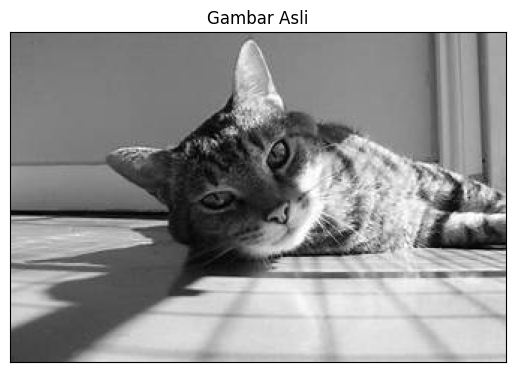

In [19]:
urllib.request.urlretrieve(
'https://tse3.mm.bing.net/th?id=OIP.jwj_rgR3b0KGsVMr5YATMwHaE7&pid=Api&P=0&h=220', # link from google image
"gambar_2.png")

# load image
image_2 = cv2.imread('gambar_2.png',cv2.IMREAD_COLOR)

# Dapatkan resolusi gambar dalam piksel
width, height = image_1.shape
print(f"Resolusi gambar 2: {width}x{height} piksel")

plt.title('Gambar Asli')
plt.imshow(image_2)
plt.xticks([])
plt.yticks([])
plt.show()

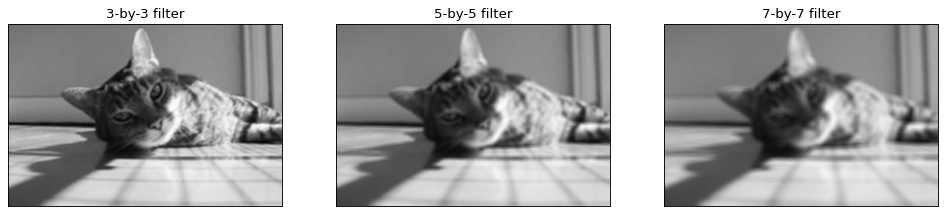

In [20]:
# Mendefinisikan kernel menggunakan numpy.
kernel_5 = np.ones((5,5),np.float32)/25
kernel_3 = np.ones((3,3),np.float32)/9
kernel_7 = np.ones((7,7),np.float32)/49

# Menggabungkan gambar dengan kernel.
# -1 berarti bahwa pusat kernel terletak pada piksel tengah.
# membandingkan tiga ukuran kernel.
filtered_5 = cv2.filter2D(image_2,-1,kernel_5)
filtered_3 = cv2.filter2D(image_2,-1,kernel_3)
filtered_7 = cv2.filter2D(image_2,-1,kernel_7)

# plot hasil 3 gambar
fig=plt.figure(figsize=(15, 15), dpi= 80, facecolor='w', edgecolor='k')

plt.subplot(1,3,1), plt.imshow(filtered_3), plt.title('3-by-3 filter')
plt.grid(False)
plt.xticks([])
plt.yticks([])

plt.subplot(1,3,2), plt.imshow(filtered_5), plt.title('5-by-5 filter')
plt.grid(False)
plt.xticks([])
plt.yticks([])

plt.subplot(1,3,3), plt.imshow(filtered_7), plt.title('7-by-7 filter')
plt.grid(False)
plt.xticks([])
plt.yticks([])

plt.show()